# ADS - Network analysis module homework

## Task (World airports). 
### Q1. 
Find the network connected components, report their number and the sizes.  

### Q2. 
In the largest connected component find and report (print a list of city names and centrality scores) top 10 airports by each centrality metric (degree, betweenneass, closeness, pagerank with $alpha=0.85$). 

### Q3. 
Find maximum and average network distance of the shortest path (number of edges, regardless of size) between all pairs of the airports from the largest connected component. Visualize the shortest path of the maximum length.

### Q4. 
Find average network distance among the top 100 airports by pagerank (with $alpha=0.85$) within the largest connected component

### Q5.
Partition the entire network using Combo algorithm, visualize the partition 


In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pycombo

In [2]:
path = 'https://raw.githubusercontent.com/CUSP-ADS2024/Data/main/'
cities = pd.read_csv(path + 'citiesTable.csv' , index_col=0 )
cities.head()

,country name,most active airport,long. most active airport,lat. most active airport,number of routes,number incoming flights,number outcoming flights,number incoming domestic flights,number outcoming domestic flights,number incoming international flights,number outcoming international flights,only domestic flights,average distance,max. distance
city name,,,,,,,,,,,,,,
London,United Kingdom,Heathrow,-0.103,51.795,1984,993,992,57,57,936,934,0,3228,11153
Chicago,United States,Chicago Ohare Intl,-87.842,42.631,1406,705,702,526,523,179,178,0,2328,12416
Paris,France,Charles De Gaulle,2.916,49.021,1254,626,629,68,68,558,560,0,3367,11652
Moscow,Russia,Domododevo,38.510,55.681,1179,589,591,231,231,358,359,0,2772,10054
Shanghai,China,Pudong,122.342,31.238,1115,560,556,357,353,203,202,0,2235,12245


In [3]:
#now read the links
links = pd.read_csv('https://raw.githubusercontent.com/CUSP-ADS2024/Data/main/citiesToCities.csv?token=GHSAT0AAAAAACMXBT22UYFOM7AYHZQZKLJ4ZPH3KEQ', index_col=None )
links.head()

,departure city,long. departure (decimal),lat. departure (decimal),departure country,arrival city,long. departure (decimal).1,lat. departure (decimal).1,arrival country,number of routes,distance
0,Sao Paulo,-46.116,-23.054,Brazil,Rio De Janeiro,-42.740,-22.682,Brazil,18,348
1,Rio De Janeiro,-42.740,-22.682,Brazil,Sao Paulo,-46.116,-23.054,Brazil,18,348
2,Beijing,116.974,40.133,China,Shanghai,122.342,31.238,China,18,1100
3,Johannesburg,28.410,-25.566,South Africa,Cape Town,19.002,-33.942,South Africa,16,1299
4,Honolulu,-157.871,21.531,United States,Tokyo,140.643,36.274,Japan,16,6103


In [4]:
#create the graph (assume connections are symmatric directionality)
Flights=nx.Graph()
Flights.add_nodes_from(cities.index)
EN=len(links.index)
edgelist=[(links['departure city'][j],links['arrival city'][j]) for j in range(EN)]
Flights.add_edges_from(edgelist)

Q1.
Find the network connected components, report their number and the sizes.

In [5]:
components = list(nx.connected_components(Flights))
print('network connected components:', components)

network connected components: [{'Salerno', 'Hervey Bay', 'Tiksi', 'Kalamata', 'Sihanoukville', 'Cape Lisburne', 'Laramie', 'Gallivare', 'Jiamusi', 'Béchar', 'Norwich', 'New Bedford', 'Bima', 'Billund', 'Narsaq', 'Rerrenabaque', 'Bisha', 'Palmas', 'Kunming', 'Prince Pupert', 'Alice Springs', 'Pico', 'F', 'Musoma', 'Central', 'Eagle', 'Matei', 'Coral Harbour', 'Deering', 'Yiwu', 'Puerto Escondido', 'Lhasa', 'Bayamo', 'Lleida', 'Crooked Creek', 'Indianapolis', 'Zhijiang', 'Tokyo', 'Santa Fe', 'Kota Kinabalu', 'Narssarssuaq', 'Barnstable', 'Norfolk', 'Scranton', 'San Luis Obispo', 'Du Bois', 'Jiujiang', 'Valera', 'Clovis', 'Petropavlovsk', 'International Falls', 'Patina', 'Hangzhou', 'Lucknow', 'Porto Seguro', 'Hopedale', 'Dallas-fort Worth', 'Lençóis', 'Lyon', 'Masset', 'Izmir', 'Andizhan', 'Roadtown/beef Island', 'Mazar-i-sharif', 'Tuktoyaktuk', 'Mianyang', 'Posadas', 'Madrid', 'Rurutu', 'Chisasibi', 'Ulyanovsk', 'Brevig Mission', 'Abeche', 'Saga', 'San Rafael', 'Lahore', 'Kayes', 'Manag

In [6]:
num_components = len(components)
print('Number of connected components:', num_components)

component_sizes = [len(comp) for comp in components]
print('Sizes of connected components:', component_sizes)

Number of connected components: 4
Sizes of connected components: [2981, 3, 2, 2]


Q2.
In the largest connected component find and report (print a list of city names and centrality scores) top 10 airports by each centrality metric (degree, betweenneass, closeness, pagerank with  𝑎𝑙𝑝ℎ𝑎=0.85).

In [7]:
largest_component = components[0]
largest_subgraph = Flights.subgraph(largest_component)

degree = nx.degree_centrality(largest_subgraph)
betweenness = nx.betweenness_centrality(largest_subgraph)
closeness = nx.closeness_centrality(largest_subgraph)
pagerank = nx.pagerank(largest_subgraph, alpha=0.85)

In [8]:
top_degree = sorted(degree.items(), key=lambda x: x[1], reverse=True)[:10]
top_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]
top_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:10]
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]

print('Top 10 airports by degree centrality:')
for airport, centrality in top_degree:
    print(airport, centrality)

print('\nTop 10 airports by betweenness centrality:')
for airport, centrality in top_betweenness:
    print(airport, centrality)

print("\nTop 10 airports by closeness centrality:")
for airport, centrality in top_closeness:
    print(airport, centrality)

print("\nTop 10 airports by pagerank:")
for airport, centrality in top_pagerank:
    print(airport, centrality)

Top 10 airports by degree centrality:
London 0.10436241610738255
Paris 0.08959731543624161
Frankfurt 0.07785234899328859
Moscow 0.07684563758389261
Amsterdam 0.0697986577181208
Atlanta 0.0697986577181208
Chicago 0.06677852348993288
Beijing 0.06174496644295302
Istanbul 0.060738255033557044
Dallas-fort Worth 0.060738255033557044

Top 10 airports by betweenness centrality:
London 0.09076727836638496
Anchorage 0.08216371312591912
Paris 0.07784192121669775
Moscow 0.061038019702898835
Chicago 0.05813492835186721
Frankfurt 0.05452341641775677
Seattle 0.052719585605351275
Dubai 0.04644272199874113
Tokyo 0.0458546447882062
Toronto 0.04531466582661801

Top 10 airports by closeness centrality:
London 0.42335559028271064
Frankfurt 0.4174838890445503
Paris 0.41637557635880956
Amsterdam 0.4094531464688101
New York 0.40053763440860213
Toronto 0.39632929910892406
Los Angeles 0.39601328903654487
Chicago 0.3927253558249868
Dubai 0.3926218708827404
Newark 0.38964435146443516

Top 10 airports by pagerank:

Q3.
Find maximum and average network distance of the shortest path (number of edges, regardless of size) between all pairs of the airports from the largest connected component. Visualize the shortest path of the maximum length.

In [9]:
shortest_paths = dict(nx.shortest_path_length(largest_subgraph))

max_shortest_path = max(max(d.values()) for d in shortest_paths.values())
avg_shortest_path = sum(sum(d.values()) for d in shortest_paths.values()) / (len(largest_subgraph.nodes()) * (len(largest_subgraph.nodes()) - 1))

print('Maximum shortest path length:', max_shortest_path)
print('Average shortest path length:', avg_shortest_path)

Maximum shortest path length: 12
Average shortest path length: 3.939842942663716


In [10]:
max_length_path = None
max_length = 0
for source, paths in shortest_paths.items():
    for target, length in paths.items():
        if length == max_shortest_path:
            max_length_path = nx.shortest_path(largest_subgraph, source, target)
            max_length = length
            break

print("Shortest path of maximum length:", max_length_path)
print("Length of the shortest path of maximum length:", max_length)

Shortest path of maximum length: ['Port Williams', 'Seal Bay', 'Kitoi Bay', 'Kodiak', 'Anchorage', 'Chicago', 'Halifax', "St. John's", 'St. Anthony', "Mary's Harbour", 'St. Lewis', 'Williams Harbour', 'Port Hope Simpson']
Length of the shortest path of maximum length: 12


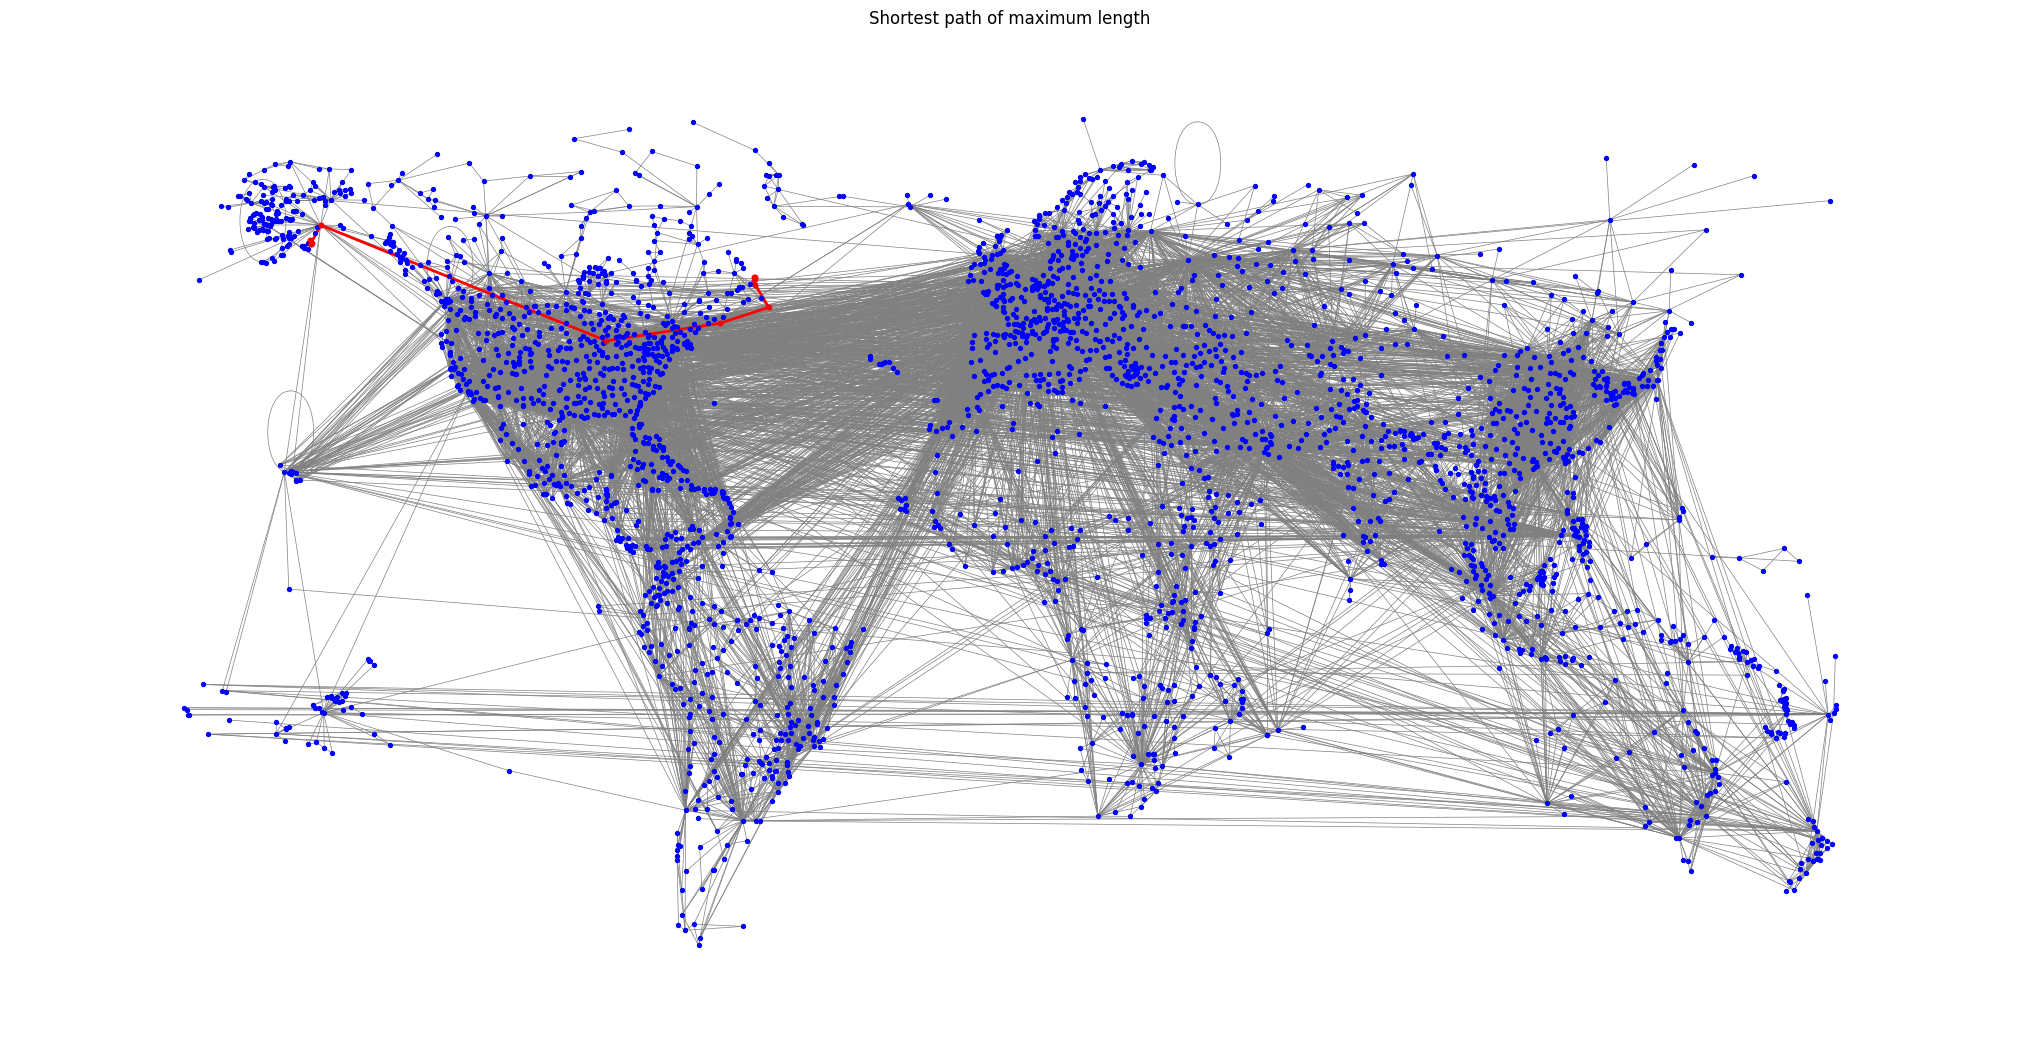

In [11]:
pos = {c: (cities.loc[c, 'long. most active airport'], cities.loc[c, 'lat. most active airport']) for c in largest_subgraph.nodes()}

plt.figure(figsize = (20,10))
nx.draw(largest_subgraph, pos, with_labels=False, node_color='blue',edge_color='grey', width=0.5, node_size=8)
nx.draw_networkx_nodes(largest_subgraph, pos, nodelist=max_length_path, node_color='red', node_size=10)
nx.draw_networkx_edges(largest_subgraph, pos, edgelist=[(max_length_path[i], max_length_path[i + 1]) for i in range(len(max_length_path) - 1)], edge_color='red', width=2)
plt.title("Shortest path of maximum length")
plt.show()

Q4.
Find average network distance among the top 100 airports by pagerank (with  𝑎𝑙𝑝ℎ𝑎=0.85) within the largest connected component

In [12]:
top_airports = sorted(pagerank, key=pagerank.get, reverse=True)[:100]

total_distance = 0
num_pairs = 0
for source in top_airports:
    for target in top_airports:
        if source != target:
            if nx.has_path(largest_subgraph, source, target):
                total_distance += nx.shortest_path_length(largest_subgraph, source, target)
                num_pairs += 1

average_distance = total_distance / num_pairs
print("Average network distance among the top 100 airports by pagerank:", average_distance)

Average network distance among the top 100 airports by pagerank: 1.731111111111111


Q5.
Partition the entire network using Combo algorithm, visualize the partition

In [13]:
PCFlights, PCFlightsMod = pycombo.execute(Flights, return_modularity=True, max_communities = 0)
PCFlightsMod

0.6606572283028292

In [14]:
def modularity(G, partition, correctLoops = False):
    A = np.array(nx.adjacency_matrix(G).todense(), dtype = float)
    if correctLoops and not isinstance(G,nx.DiGraph):
        A += np.diag(np.diag(A))
    wout = A.sum(axis=1)
    win = A.sum(axis=0)
    T = wout.sum()
    Q = A / T - np.matmul(wout.reshape(-1, 1), win.reshape(1, -1)) / (T ** 2)
    C = np.array([partition[n] for n in G.nodes()])
    return (Q * (C.reshape(-1,1) == C.reshape(1,-1))).sum()

In [15]:
modularity(Flights,PCFlights)

0.6606130489053647

In [16]:
PCFlights

{'London': 14,
 'Chicago': 4,
 'Paris': 14,
 'Moscow': 8,
 'Shanghai': 7,
 'Beijing': 7,
 'Denver': 4,
 'Los Angeles': 4,
 'New York': 4,
 'Frankfurt': 14,
 'Houston': 4,
 'Washington': 4,
 'Newark': 4,
 'Tokyo': 7,
 'Amsterdam': 14,
 'Madrid': 14,
 'Seoul': 7,
 'Istanbul': 6,
 'Singapore': 7,
 'Bangkok': 7,
 'Atlanta': 4,
 'Rome': 14,
 'San Francisco': 4,
 'Barcelona': 14,
 'Munich': 14,
 'Toronto': 4,
 'Hong Kong': 7,
 'Dubai': 6,
 'Guangzhou': 7,
 'Dallas-fort Worth': 4,
 'Sao Paulo': 0,
 'Delhi': 6,
 'Brussels': 14,
 'Taipei': 7,
 'Kuala Lumpur': 7,
 'Miami': 4,
 'Chengdu': 7,
 'Vienna': 14,
 'Charlotte': 4,
 'Zurich': 14,
 'Manchester': 14,
 'Mexico City': 4,
 'St. Petersburg': 8,
 'Duesseldorf': 14,
 'Las Vegas': 4,
 'Copenhagen': 14,
 'Minneapolis': 4,
 'Bombay': 6,
 'Stockholm': 14,
 'Shenzhen': 7,
 'Orlando': 4,
 'Phoenix': 4,
 'Philadelphia': 4,
 'Milano': 14,
 'Kunming': 7,
 'Berlin': 14,
 'Chongqing': 7,
 'Detroit': 4,
 'Seattle': 4,
 'Manila': 7,
 "Xi'an": 7,
 'Boston': 4,

In [17]:
import matplotlib
def visualizePartition(G,partition,pos):
    plt.figure(figsize=(20,10))
    PN=max(partition.values())
    my_cmap = matplotlib.cm.hsv(np.linspace(0,1,PN+1))
    c=[]
    for n in G.nodes():
        c.append(1.0*partition[n]/PN)
    nx.draw(G,pos=pos,with_labels=False,node_size=20,node_color=c,width=1,edge_color='grey')

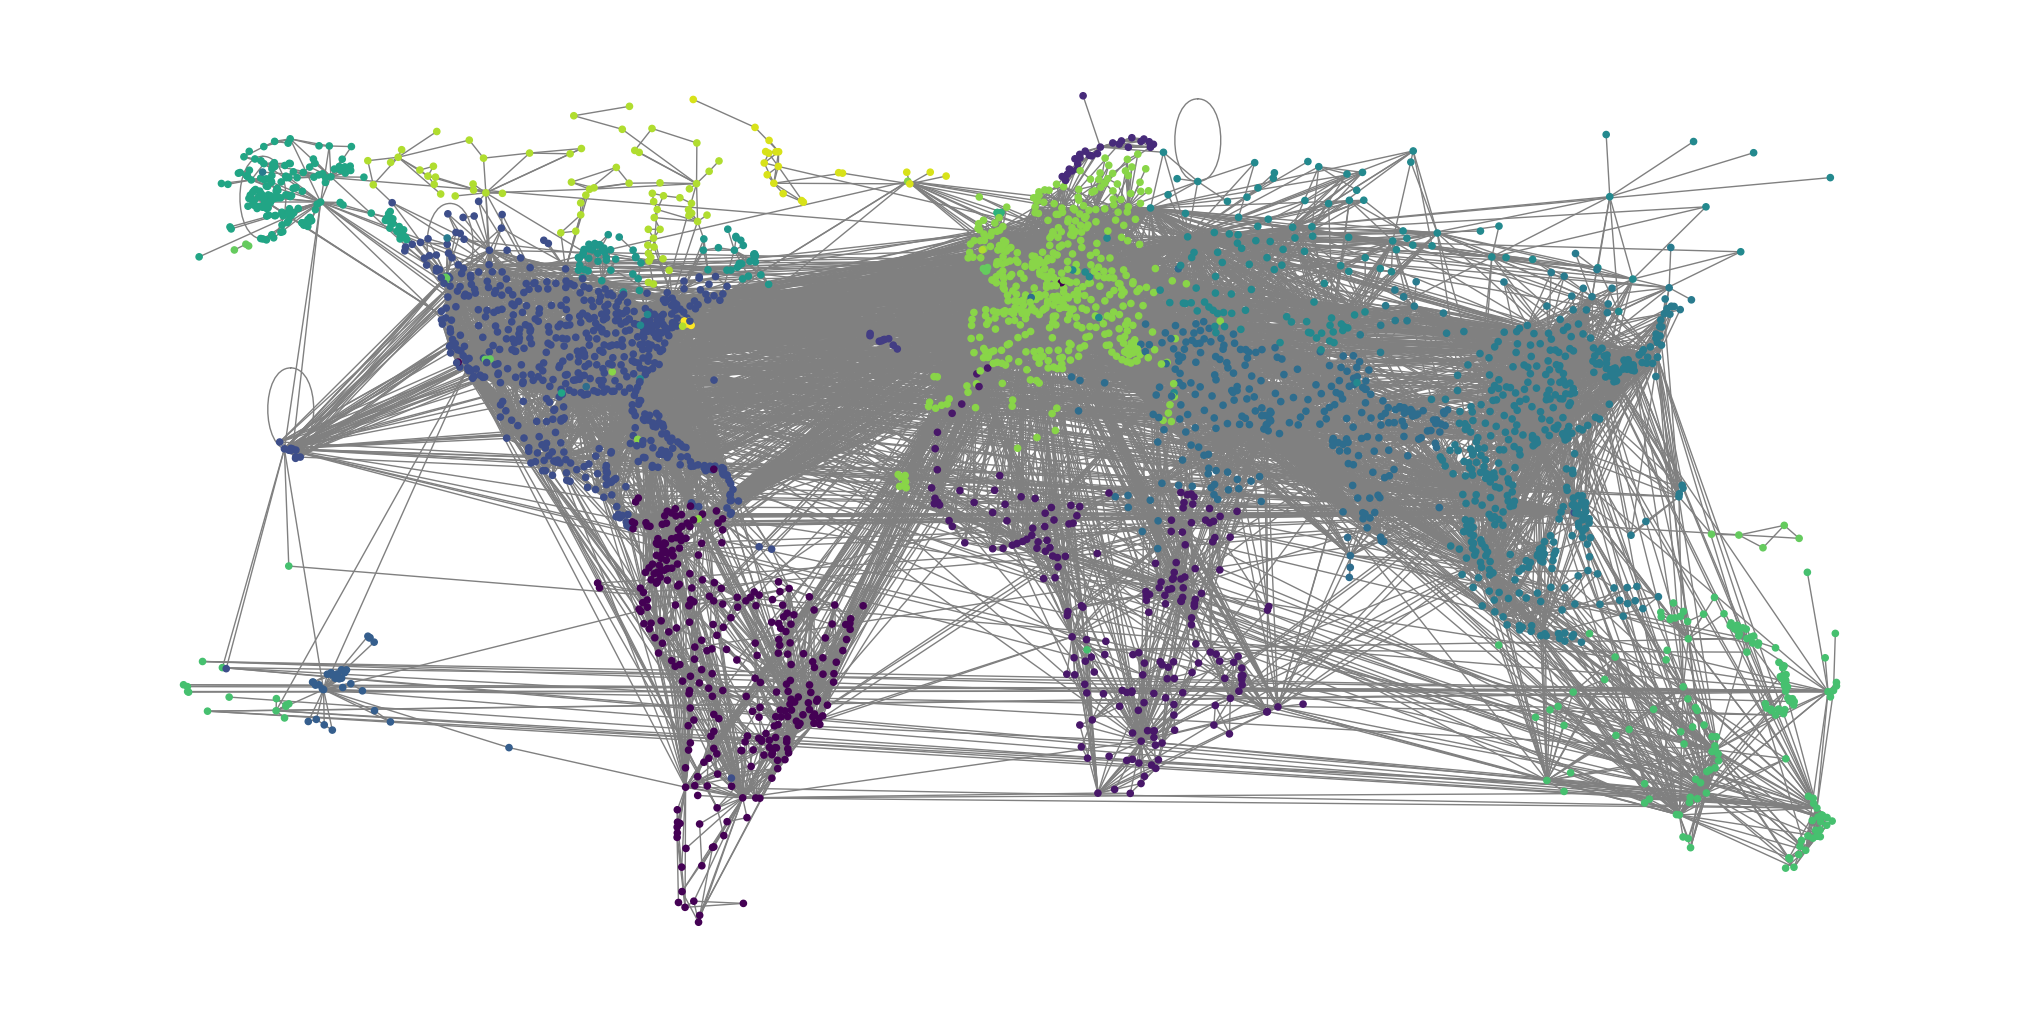

In [18]:
pos = {c: (cities.loc[c, 'long. most active airport'], cities.loc[c, 'lat. most active airport']) for c in Flights.nodes()}
visualizePartition(Flights,PCFlights,pos)